<a href="https://colab.research.google.com/github/bingsen-wang/PowerElectronics/blob/main/PowerSwitchingDevices_MOSFET_RDSon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>$R_{DS(on)}$ of Power MOSFET
</h1></b>

Dr. Bingsen Wang

1/2/2024
</center>

#$V_{DS}$-$I_D$ Characteristics: Ohmic Region

In the ohmic region, the following condition holds
$$\begin{align}
  v_{GS} &\gt V_{th}\\
  v_{DS} &\lt v_{GS} - V_{th}
\end{align}\tag{1}$$
where $V_{th}$ is the gate-source threshold voltage.

In ohmic region, the drain current $i_D$ is
$$ i_D =  K[2(v_{GS}-V_{th})v_{DS} - v_{DS}^2] \tag{2}$$
where $K$ is a constant determined by the physical parameters of the device.

The on resistance is
$$R_{DS(on)} = \frac{v_{DS}}{i_D}\tag{3}$$

Substituting (2) into (3) yields
$$R_{DS(on)} = \frac{1}{ K[2(v_{GS}-V_{th}) - v_{DS}]}\tag{4}$$

#Python Code
The Python code plots the on resistance $R_{DS(on)}$ for various $v_{DS}$ values.

0
0
1
2
3
4
5
6
7
8
9
0


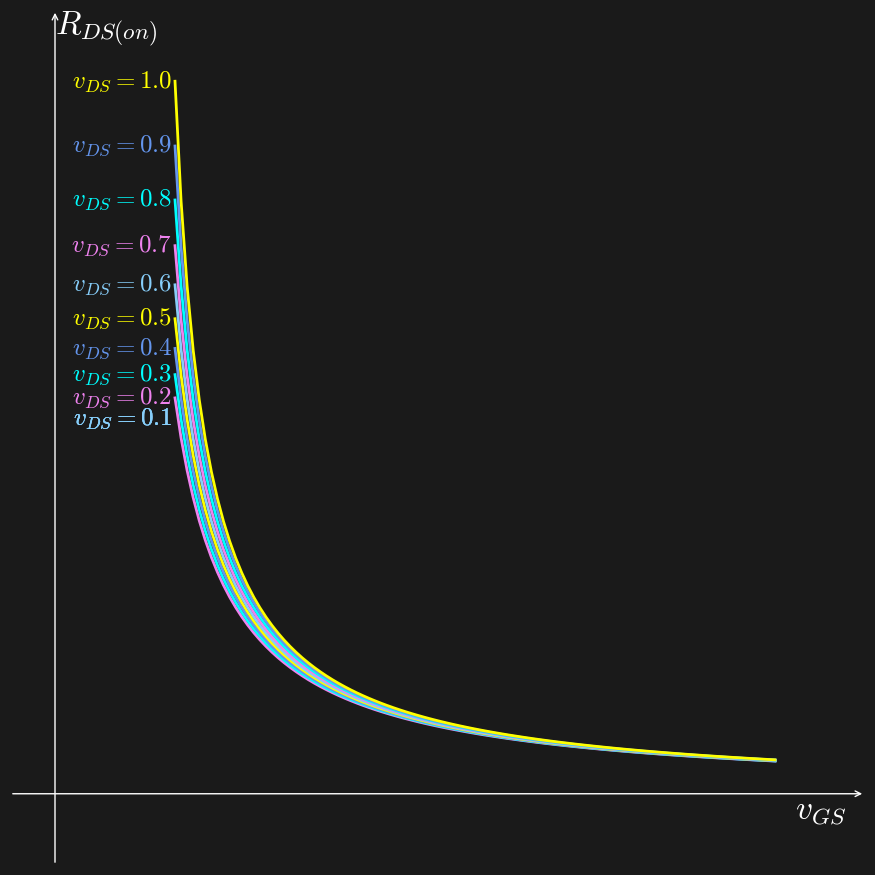

In [38]:
import matplotlib
from os import linesep
from numpy import linspace,logspace,exp,log,fft,pi,arccos,cos,heaviside
import matplotlib.pyplot as plt
from scipy.integrate import quad
from matplotlib import animation,rc
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "sans serif","mathtext.fontset" : "cm"})

def Rds_on(vGS,Vth,vDS,K): #ohmic region
  return 1/(K*(2*(vGS-Vth) - vDS))

#parameters
clst=['lightskyblue','violet','aqua','cornflowerblue','yellow','w',(.1,.1,.1)] #colors dark bg
Nf = 100
Vth = 4
K=1 #determined by phsysical parameters such as material and device geometry
vDS_max = 1
vDS=linspace(0.1,vDS_max,10)
vGS = linspace(5,15,Nf)
Rds_lst=[]
for v in vDS:
  Rds_lst.append(Rds_on(vGS,Vth,v,K))
Rds_max = max(Rds_lst[-1])
vGS_max = max(vGS)
#set up figures
fig = plt.figure(figsize=(9,9),facecolor=clst[-1])
ax_frame = [[0, 0, .95, .95], [.15,1.1], [-.1,1.1]]# [pos-boundary, xlim, ylim]
xn,xm,yn,ym = ax_frame[1]+ax_frame[2]
ax=fig.add_axes(ax_frame[0],xlim=ax_frame[1], ylim=ax_frame[2],fc='none',) #no face color
ax.axis('off')
ax.annotate("", (xm, 0), (xn, 0),arrowprops={'arrowstyle':"->",'color':clst[-2]}) #x-axis
ax.annotate("", (xn+.05,ym), (xn+.05,yn),arrowprops={'arrowstyle':"->",'color':clst[-2]}) #y-axis
ax.text(xm-.02,0,r'$v_{GS}$',size=24,va='top',ha='right',color=clst[-2]) #x-axis label
ax.text(xn+.05,ym,r'$R_{DS(on)}$',size=24,va='top',color=clst[-2]) #x-axis label
lines_Rds = [] #lines for the family of iD-vDS curves
for i in range(len(vDS)):
  lines_Rds.append(ax.plot([],[],lw=2,color=clst[i%5])[0])
# animation function. This is called sequentially
def animate(i):
  ii = i%Nf
  k = int(i/Nf)
  if ii==0:
    print(k) #for monitoring
    ax.text(0.33,Rds_lst[k][0]/Rds_max,'$v_{DS}='+str(round(vDS[k],1))+'$',ha='right',
            va='center',color=clst[k%5],size=18)
  # lines_Rds[k].set_data(vGS/vGS_max,Rds_lst[k]/Rds_max)
  lines_Rds[k].set_data(vGS[:ii+1]/vGS_max,Rds_lst[k][:ii+1]/Rds_max)

  return
anim = animation.FuncAnimation(fig, animate, frames=Nf*(len(vDS)), interval=20)
# anim #uncomment to generate animation in the output area
anim.save("MOSFET_Rdson.mp4", fps=50, dpi = 120) #uncomment to save